# MAP COLORING

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd 'drive/MyDrive/Colab Notebooks/MAP_COLORING'

/content/drive/MyDrive/Colab Notebooks/MAP_COLORING


In [3]:
ls

india.dbf  india.shp  india.shx  mapcol_python  usa.dbf  usa.shp  usa.shx


In [ ]:
!pip install geopandas

In [5]:
import geopandas as gpd

In [110]:
colors = ['green','blue','purple','orange','pink','yellow','red']

**USA**

In [111]:
file = "usa.shp"    

# open file
gdf = gpd.read_file(file)

# Drop Alaska, Hawaii, Commonwealth of the Northern Mariana Islands
gdf = gdf.drop([27,42,45])

# add NEIGHBORS column
gdf["NEIGHBORS"] = None

# add color column
gdf["COLOR"] = -1

for index, country in gdf.iterrows():   

    # get 'not disjoint' countries
    neighbors = gdf[~gdf.geometry.disjoint(country.geometry)].NAME.tolist()

    # remove own name of the country from the list
    neighbors = [ name for name in neighbors if country.NAME != name ]

    # add names of neighbors as NEIGHBORS value
    gdf.at[index, "NEIGHBORS"] = ",".join(neighbors)

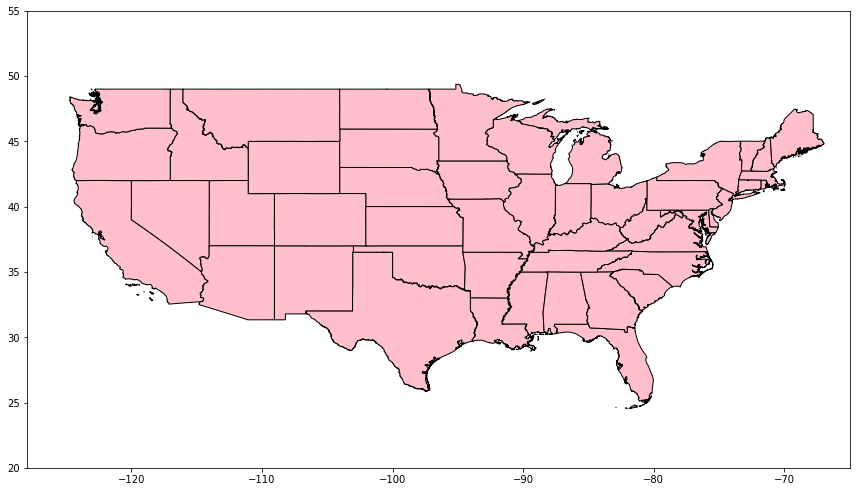

In [122]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12,9))
gdf.plot(ax=ax, color='pink', edgecolor='black')
ax.set_xlim(-128, -65)
ax.set_ylim(20, 55)
plt.tight_layout()
plt.show()

### 1. USING GREEDY ALGORITHM

In [123]:
gdf.at[0,"COLOR"]=0

numclrs=1

V=len(gdf)

mydict={}

for index, country in gdf.iterrows():
    mydict[country.NAME]=index

for index, country in gdf.iterrows():
    if index==0:
        continue

    unavailable = [False] * V

    neighbors = gdf.at[index, "NEIGHBORS"].split(',')

    for i in neighbors:
        if i is not '':
          idx=mydict[i]
          unavailable[gdf.at[idx,"COLOR"]]=True

    # Find the first available color
    cr = 0
    while cr < V:
        if (unavailable[cr] == False):
            break

        cr += 1

    # Assign the found color
    gdf.at[index, "COLOR"] = cr
    numclrs = max(numclrs, cr)

In [124]:
gdf["COLOR_NAME"]=""

for index, country in gdf.iterrows():
    if index==0:
        gdf["COLOR_NAME"]=colors[0]
        continue
    c = gdf.at[index, "COLOR"]
    gdf.at[index, "COLOR_NAME"]=colors[c]

In [125]:
gdf.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,NEIGHBORS,COLOR,COLOR_NAME
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...","Louisiana,Alabama,Tennessee,Arkansas",0,green
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...","Virginia,Georgia,Tennessee,South Carolina",0,green
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6...","New Mexico,Texas,Missouri,Colorado,Kansas,Arka...",0,green
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...","North Carolina,West Virginia,Tennessee,Distric...",1,blue
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169...","Virginia,Pennsylvania,Maryland,Kentucky,Ohio",0,green


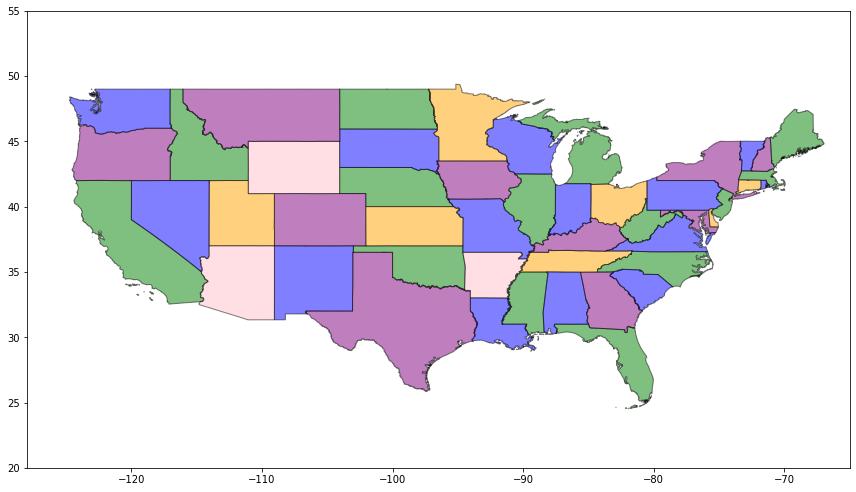

Number of colors needed :  5


In [128]:
fig, ax = plt.subplots(figsize = (12,9))
gdf.plot(ax=ax,color=gdf['COLOR_NAME'],alpha=0.5, edgecolor='black')
ax.set_xlim(-128, -65)
ax.set_ylim(20, 55)
plt.tight_layout()
plt.show()

print("Number of colors needed : ",numclrs+1)

### 2. USING BACKTRACKING ALGORITHM

In [129]:
class Graph():

	def __init__(self, vertices):
		self.V = vertices
		self.graph = [[0 for column in range(vertices)]\
							for row in range(vertices)]

	def isSafe(self, v, colour, c):
		for i in range(self.V):
			if self.graph[v][i] == 1 and colour[i] == c:
				return False
		return True

	def graphColourUtil(self, m, colour, v):
		if v == self.V:
			return True

		for c in range(1, m + 1):
			if self.isSafe(v, colour, c) == True:
				colour[v] = c
				if self.graphColourUtil(m, colour, v + 1) == True:
					return True
				colour[v] = 0

	def graphColouring(self, m):
		colour = [0] * self.V
		if self.graphColourUtil(m, colour, 0) == None:
			return False

		coloring=[]
		for c in colour:
			coloring.append(c)
		return coloring

In [130]:
gdf.reset_index(inplace=True) ## => Do this to make the index values continuous

numvertices=len(gdf)

mydict={}

for index, country in gdf.iterrows():
    mydict[country.NAME]=index

g = Graph(numvertices)

for index, country in gdf.iterrows():
    neighbors = gdf.at[index, "NEIGHBORS"].split(',')

    for i in neighbors:
        if i is not '':
          idx=mydict[i]
          g.graph[index][idx]=1
          g.graph[idx][index]=1

#Number of available colors (m)
m=4

cr = g.graphColouring(m)

In [131]:
for index, country in gdf.iterrows():
    gdf.at[index, "COLOR"] = cr[index]

In [132]:
gdf["COLOR_NAME"]=""

for index, country in gdf.iterrows():
    c = gdf.at[index, "COLOR"]
    gdf.at[index, "COLOR_NAME"]=colors[c]

In [133]:
gdf.head()

,index,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,NEIGHBORS,COLOR,COLOR_NAME
0,0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...","Louisiana,Alabama,Tennessee,Arkansas",1,blue
1,1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...","Virginia,Georgia,Tennessee,South Carolina",1,blue
2,2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6...","New Mexico,Texas,Missouri,Colorado,Kansas,Arka...",1,blue
3,3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...","North Carolina,West Virginia,Tennessee,Distric...",2,purple
4,4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169...","Virginia,Pennsylvania,Maryland,Kentucky,Ohio",1,blue


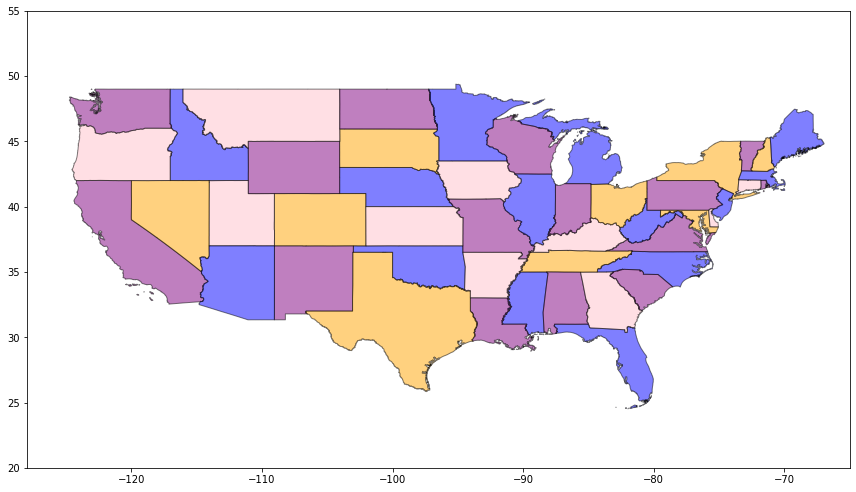

Number of colors needed :  4


In [136]:
fig, ax = plt.subplots(figsize = (12,9))
gdf.plot(ax=ax,color=gdf['COLOR_NAME'],alpha=0.5, edgecolor='black')
ax.set_xlim(-128, -65)
ax.set_ylim(20, 55)
plt.tight_layout()
plt.show()

print("Number of colors needed : ",m)

**INDIA**

### 1. USING GREEDY

In [96]:
file = "india.shp"    

# open file
gdf = gpd.read_file(file)

In [97]:
file = "india.shp"    

# open file
gdf = gpd.read_file(file)

# Drop union territories
gdf = gdf.drop([2,17,19,21,34,36])

# add NEIGHBORS column
gdf["NEIGHBORS"] = None

# add color column
gdf["COLOR"] = -1

for index, country in gdf.iterrows():   

    # get 'not disjoint' countries
    neighbors = gdf[~gdf.geometry.disjoint(country.geometry)].ST_NM.tolist()

    # remove own name of the country from the list
    neighbors = [ name for name in neighbors if country.ST_NM != name ]

    # add names of neighbors as NEIGHBORS value
    gdf.at[index, "NEIGHBORS"] = ",".join(neighbors)

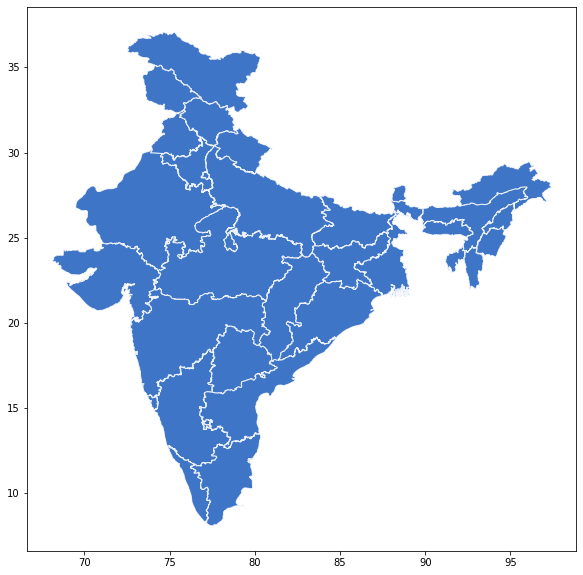

In [98]:
gdf.plot(figsize = (10,10),color="#0F52BA",edgecolor='white',alpha=0.8,linewidth=1)

In [99]:
gdf.at[0,"COLOR"]=0

numclrs=1

V=len(gdf)

mydict={}

for index, country in gdf.iterrows():
    mydict[country.ST_NM]=index

for index, country in gdf.iterrows():
    if index==0:
        continue

    unavailable = [False] * V

    neighbors = gdf.at[index, "NEIGHBORS"].split(',')

    for i in neighbors:
        if i is not '':
          idx=mydict[i]
          unavailable[gdf.at[idx,"COLOR"]]=True

    # Find the first available color
    cr = 0
    while cr < V:
        if (unavailable[cr] == False):
            break

        cr += 1

    # Assign the found color
    gdf.at[index, "COLOR"] = cr
    numclrs = max(numclrs, cr)

In [100]:
gdf.head()

,ST_NM,geometry,NEIGHBORS,COLOR
0,Arunachal Pradesh,"POLYGON ((96.08866 29.45997, 96.09428 29.45477...","Assam,Nagaland",0
1,Assam,"POLYGON ((95.97166 27.96254, 95.97174 27.96227...","Arunachal Pradesh,Manipur,Meghalaya,Mizoram,Na...",1
3,Karnataka,"POLYGON ((77.32647 18.45884, 77.32648 18.45803...","Telangana,Kerala,Goa,Tamil Nadu,Andhra Pradesh...",0
4,Manipur,"POLYGON ((94.57315 25.69156, 94.57522 25.69094...","Assam,Mizoram,Nagaland",0
5,Meghalaya,"POLYGON ((91.82534 26.11950, 91.82610 26.11935...",Assam,0


In [101]:
colors = ["#002366","#0F52BA","#ac92eb", "#4fc1e8" ,"#dc6f79"]

In [102]:
gdf["COLOR_NAME"]=""

for index, country in gdf.iterrows():
    c = gdf.at[index, "COLOR"]
    gdf.at[index, "COLOR_NAME"]=colors[c]

Number of colors needed :  5


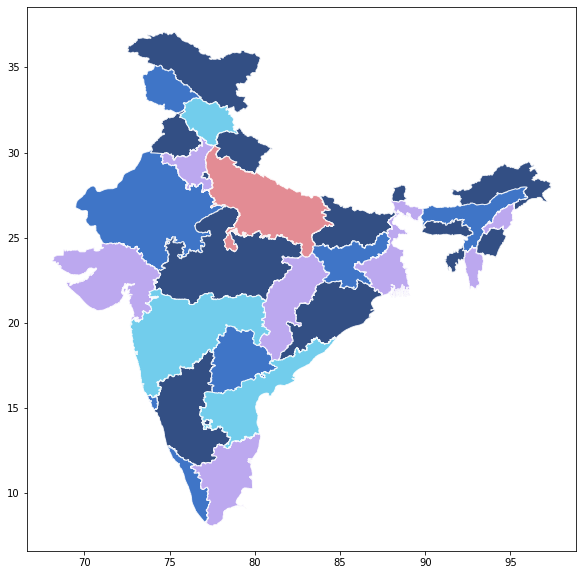

In [104]:
gdf.plot(color=gdf['COLOR_NAME'],figsize = (10,10),edgecolor='white',linewidth=1,alpha=0.8)

print("Number of colors needed : ",numclrs+1)

### 2. USING BACKTRACKING

In [105]:
gdf.reset_index(inplace=True)

In [106]:
numvertices=len(gdf)

mydict={}

for index, country in gdf.iterrows():
    mydict[country.ST_NM]=index

g = Graph(numvertices)

for index, country in gdf.iterrows():
    neighbors = gdf.at[index, "NEIGHBORS"].split(',')

    for i in neighbors:
        if i is not '':
          idx=mydict[i]
          g.graph[index][idx]=1
          g.graph[idx][index]=1

m=4

cr = g.graphColouring(m)

In [107]:
for index, country in gdf.iterrows():
    gdf.at[index, "COLOR"] = cr[index]

In [108]:
gdf["COLOR_NAME"]=""

for index, country in gdf.iterrows():
    c = gdf.at[index, "COLOR"]
    gdf.at[index, "COLOR_NAME"]=colors[c-1]

Number of colors used :  4


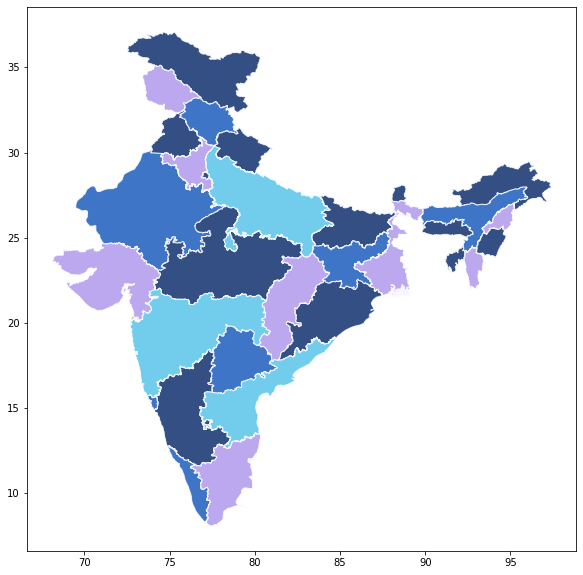

In [109]:
gdf.plot(color=gdf['COLOR_NAME'],figsize = (10,10),edgecolor='white',linewidth=1,alpha=0.8)

print("Number of colors used : ",m)